[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b_score.json
[warn] missing from loaded results: ['qwen2.5_1.5b_baseline_score']


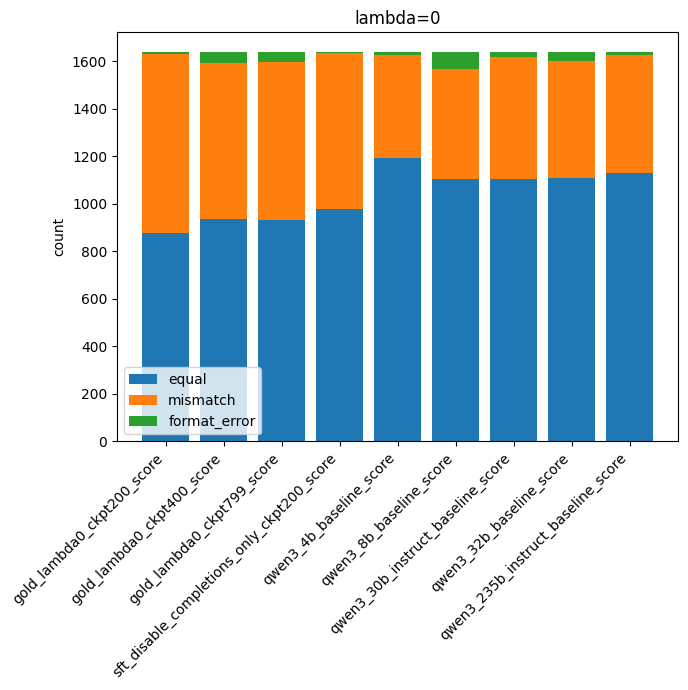

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "*_lambda0_*_score.json"

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "qwen2.5_1.5b_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "qwen3_8b_baseline_score.json",
    RESULTS_DIR / "qwen3_32b_baseline_score.json",
    RESULTS_DIR / "qwen3_30b_instruct_baseline_score.json",
    RESULTS_DIR / "qwen3_235b_instruct_baseline_score.json",
    RESULTS_DIR / "sft_disable_completions_only_ckpt200_score.json",
]

TITLE = "lambda=0"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "qwen2.5_1.5b_baseline_score",
    # then your sweep runs in the order you want:
    "gold_lambda0_ckpt200_score",
    "gold_lambda0_ckpt400_score",
    "gold_lambda0_ckpt799_score",
    "sft_disable_completions_only_ckpt200_score",
    "qwen3_4b_baseline_score",
    "qwen3_8b_baseline_score",
    "qwen3_30b_instruct_baseline_score",
    "qwen3_32b_baseline_score",
    "qwen3_235b_instruct_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
bottom2 = [e + m for e, m in zip(equal, mismatch)]
plt.bar(x, format_error, bottom=bottom2, label="format_error")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

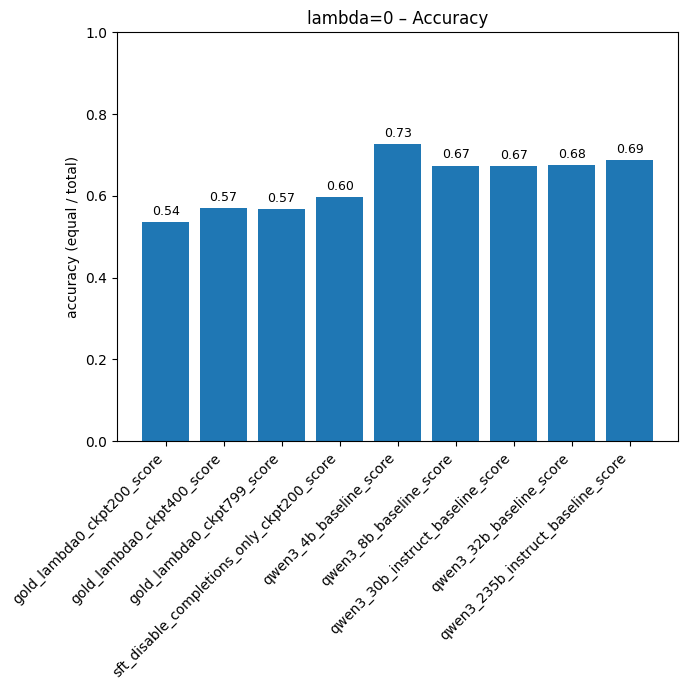

In [17]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b_score.json
[warn] missing from loaded results: ['qwen2.5_1.5b_baseline_score']


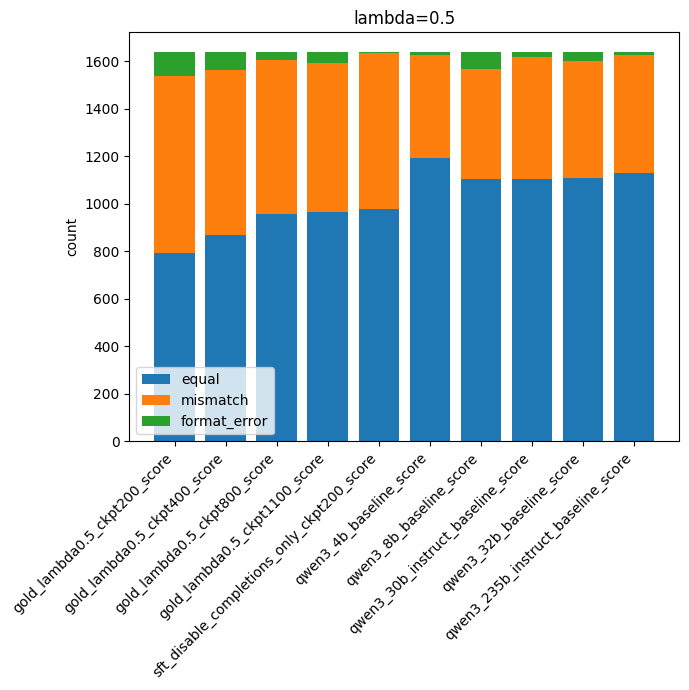

In [18]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "*_lambda0.5_*_score.json"

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "qwen2.5_1.5b_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "qwen3_8b_baseline_score.json",
    RESULTS_DIR / "qwen3_32b_baseline_score.json",
    RESULTS_DIR / "qwen3_30b_instruct_baseline_score.json",
    RESULTS_DIR / "qwen3_235b_instruct_baseline_score.json",
    RESULTS_DIR / "sft_disable_completions_only_ckpt200_score.json",
]

TITLE = "lambda=0.5"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "qwen2.5_1.5b_baseline_score",
    # then your sweep runs in the order you want:
    "gold_lambda0.5_ckpt200_score",
    "gold_lambda0.5_ckpt400_score",
    "gold_lambda0.5_ckpt800_score",
    "gold_lambda0.5_ckpt1100_score",
    "sft_disable_completions_only_ckpt200_score",
    "qwen3_4b_baseline_score",
    "qwen3_8b_baseline_score",
    "qwen3_30b_instruct_baseline_score",
    "qwen3_32b_baseline_score",
    "qwen3_235b_instruct_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
bottom2 = [e + m for e, m in zip(equal, mismatch)]
plt.bar(x, format_error, bottom=bottom2, label="format_error")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

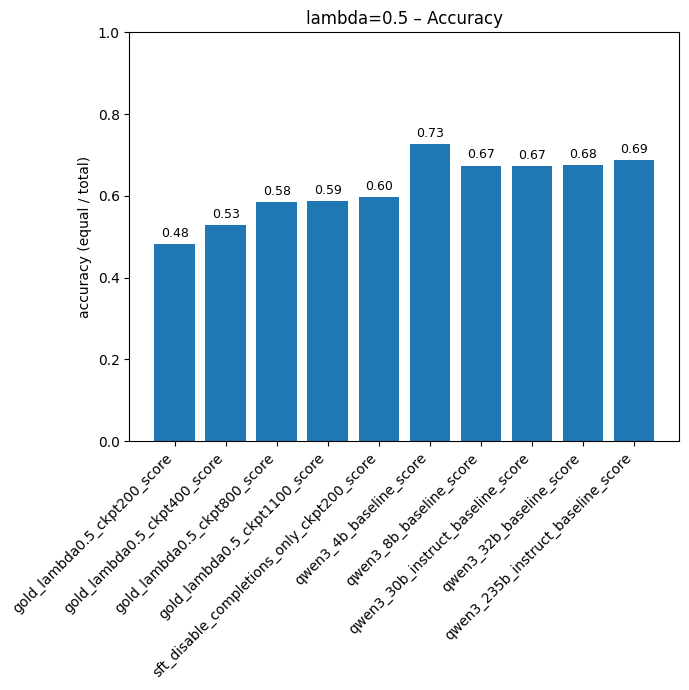

In [19]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b_score.json
[warn] missing from loaded results: ['qwen2.5_1.5b_baseline_score']


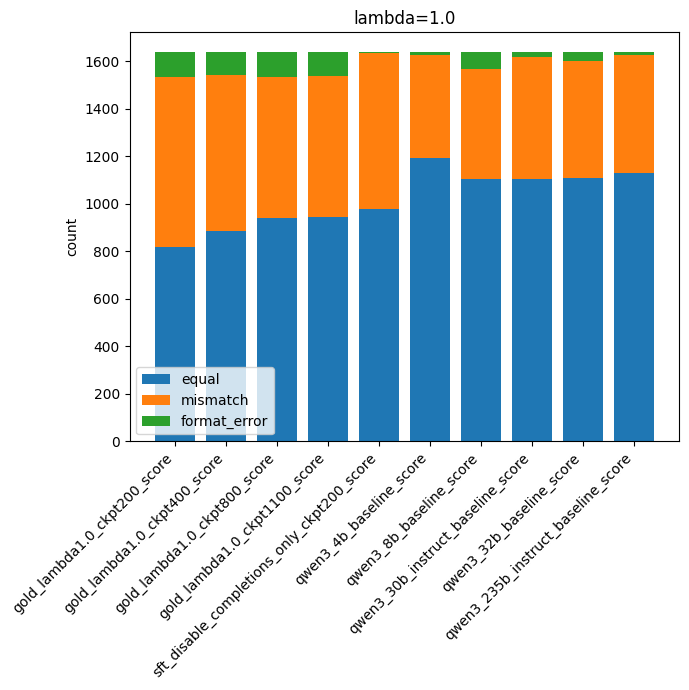

In [20]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "*_lambda1.0_*_score.json"

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "qwen2.5_1.5b_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "qwen3_8b_baseline_score.json",
    RESULTS_DIR / "qwen3_32b_baseline_score.json",
    RESULTS_DIR / "qwen3_30b_instruct_baseline_score.json",
    RESULTS_DIR / "qwen3_235b_instruct_baseline_score.json",
    RESULTS_DIR / "sft_disable_completions_only_ckpt200_score.json",
]

TITLE = "lambda=1.0"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "qwen2.5_1.5b_baseline_score",
    # then your sweep runs in the order you want:
    "gold_lambda1.0_ckpt200_score",
    "gold_lambda1.0_ckpt400_score",
    "gold_lambda1.0_ckpt800_score",
    "gold_lambda1.0_ckpt1100_score",
    "sft_disable_completions_only_ckpt200_score",
    "qwen3_4b_baseline_score",
    "qwen3_8b_baseline_score",
    "qwen3_30b_instruct_baseline_score",
    "qwen3_32b_baseline_score",
    "qwen3_235b_instruct_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
bottom2 = [e + m for e, m in zip(equal, mismatch)]
plt.bar(x, format_error, bottom=bottom2, label="format_error")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

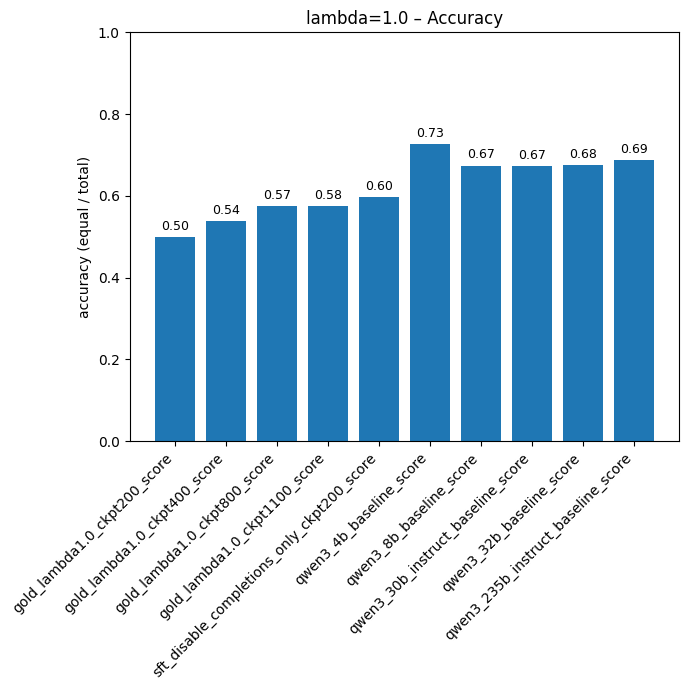

In [21]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b_score.json
[warn] missing from loaded results: ['qwen2.5_1.5b_baseline_score']


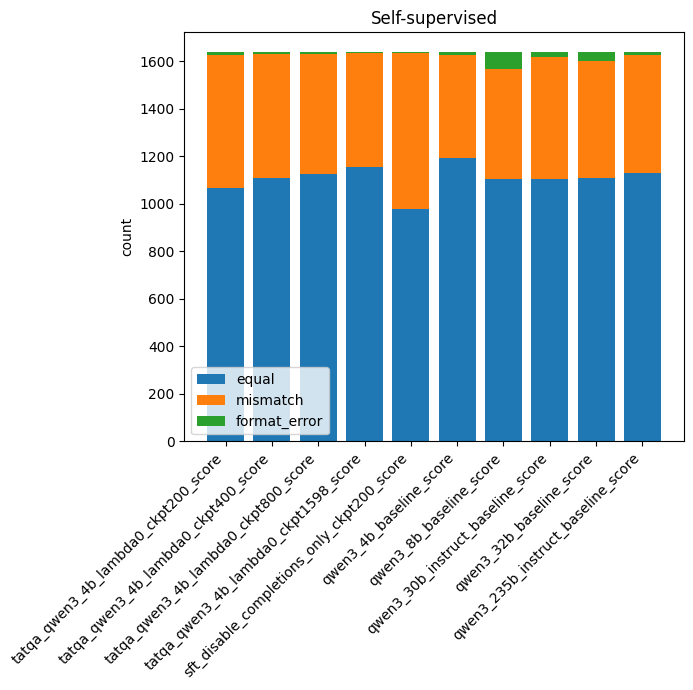

In [5]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "*tatqa_qwen3_4b_lambda0_ckpt*_score.json"

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "qwen2.5_1.5b_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "qwen3_8b_baseline_score.json",
    RESULTS_DIR / "qwen3_32b_baseline_score.json",
    RESULTS_DIR / "qwen3_30b_instruct_baseline_score.json",
    RESULTS_DIR / "qwen3_235b_instruct_baseline_score.json",
    RESULTS_DIR / "sft_disable_completions_only_ckpt200_score.json",
]

TITLE = "Self-supervised"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "qwen2.5_1.5b_baseline_score",
    # then your sweep runs in the order you want:
    "tatqa_qwen3_4b_lambda0_ckpt200_score",
    "tatqa_qwen3_4b_lambda0_ckpt400_score",
    "tatqa_qwen3_4b_lambda0_ckpt800_score",
    "tatqa_qwen3_4b_lambda0_ckpt1598_score",
    "sft_disable_completions_only_ckpt200_score",
    "qwen3_4b_baseline_score",
    "qwen3_8b_baseline_score",
    "qwen3_30b_instruct_baseline_score",
    "qwen3_32b_baseline_score",
    "qwen3_235b_instruct_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
bottom2 = [e + m for e, m in zip(equal, mismatch)]
plt.bar(x, format_error, bottom=bottom2, label="format_error")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

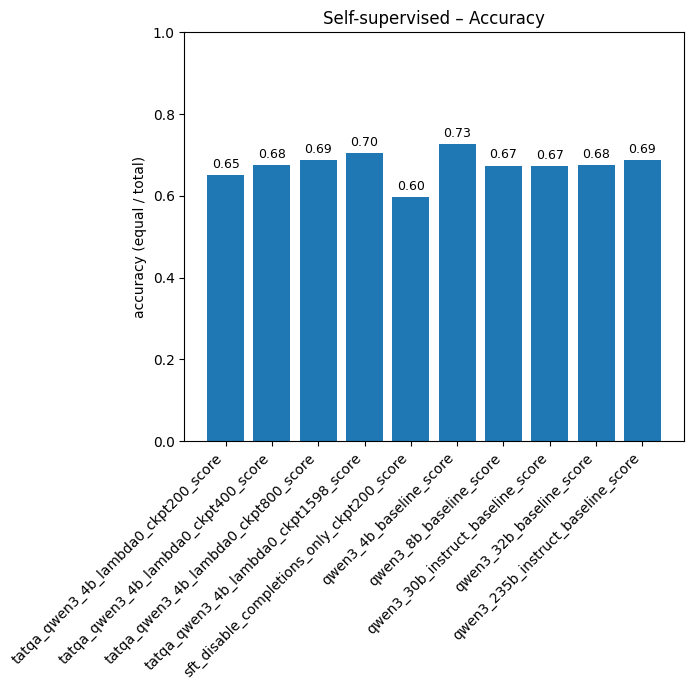

In [6]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b_score.json
[warn] missing from loaded results: ['qwen2.5_1.5b_baseline_score', 'tatqa_qwen3_4b_lambda0_ckpt200_score', 'tatqa_qwen3_4b_lambda0_ckpt400_score', 'tatqa_qwen3_4b_lambda0_ckpt800_score', 'tatqa_qwen3_4b_lambda0_ckpt1598_score']


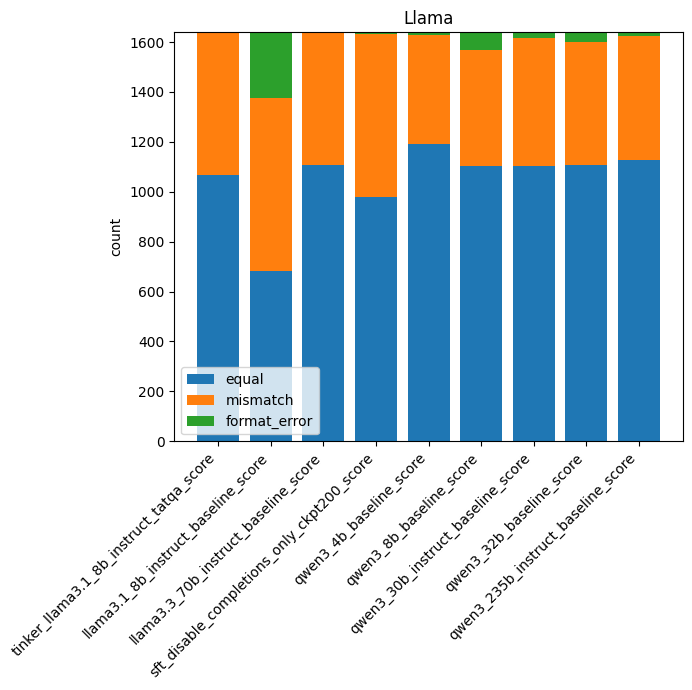

In [6]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "llama*_score.json"

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "tinker_llama3.1_8b_instruct_tatqa_score.json",
    RESULTS_DIR / "qwen2.5_1.5b_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "qwen3_8b_baseline_score.json",
    RESULTS_DIR / "qwen3_32b_baseline_score.json",
    RESULTS_DIR / "qwen3_30b_instruct_baseline_score.json",
    RESULTS_DIR / "qwen3_235b_instruct_baseline_score.json",
    RESULTS_DIR / "sft_disable_completions_only_ckpt200_score.json",
]

TITLE = "Llama"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "tinker_llama3.1_8b_instruct_tatqa_score",
    "llama3.1_8b_instruct_baseline_score",
    "llama3.3_70b_instruct_baseline_score",
    "qwen2.5_1.5b_baseline_score",
    # then your sweep runs in the order you want:
    "tatqa_qwen3_4b_lambda0_ckpt200_score",
    "tatqa_qwen3_4b_lambda0_ckpt400_score",
    "tatqa_qwen3_4b_lambda0_ckpt800_score",
    "tatqa_qwen3_4b_lambda0_ckpt1598_score",
    "sft_disable_completions_only_ckpt200_score",
    "qwen3_4b_baseline_score",
    "qwen3_8b_baseline_score",
    "qwen3_30b_instruct_baseline_score",
    "qwen3_32b_baseline_score",
    "qwen3_235b_instruct_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
bottom2 = [e + m for e, m in zip(equal, mismatch)]
plt.bar(x, format_error, bottom=bottom2, label="format_error")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

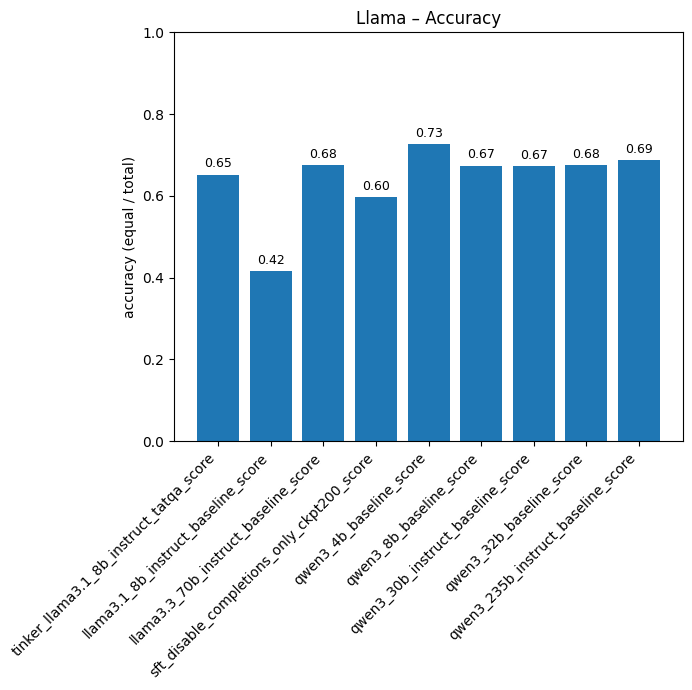

In [7]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


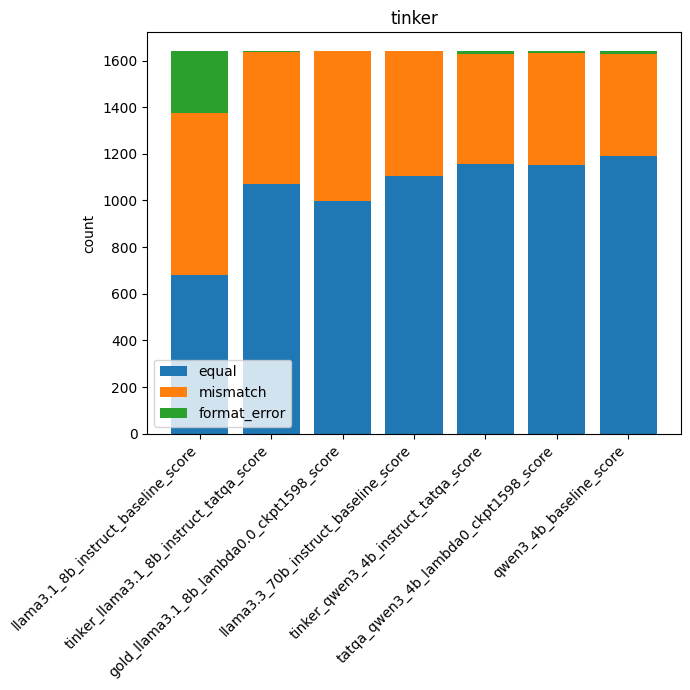

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = None

# baselines (constant)
BASELINE_FILES = [
    RESULTS_DIR / "tinker_qwen3_4b_instruct_tatqa_score.json",
    RESULTS_DIR / "tatqa_qwen3_4b_lambda0_ckpt1598_score.json",
    RESULTS_DIR / "qwen3_4b_baseline_score.json",
    RESULTS_DIR / "llama3.1_8b_instruct_baseline_score.json",
    RESULTS_DIR / "gold_llama3.1_8b_lambda0.0_ckpt1598_score.json",
    RESULTS_DIR / "tinker_llama3.1_8b_instruct_tatqa_score.json",
    RESULTS_DIR / "llama3.3_70b_instruct_baseline_score.json",


]

TITLE = "tinker"
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "total": data.get("total", 0),
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
    }


def load_results(results_dir: Path, file_glob: str|None, baseline_files=None):
    rows = []

    # 1) load baselines first (constant)
    if baseline_files:
        for fp in baseline_files:
            if not fp.exists():
                print(f"[skip] baseline not found: {fp}")
                continue
            row = load_one_json(fp)
            if row:
                rows.append(row)

    # 2) load sweep results (varying)
    if file_glob is None:
        return rows
    
    for fp in sorted(results_dir.glob(file_glob)):
        row = load_one_json(fp)
        if row:
            rows.append(row)

    return rows


rows = load_results(RESULTS_DIR, FILE_GLOB, baseline_files=BASELINE_FILES)

# ---- define desired bar order ----
BAR_ORDER = [
    "llama3.1_8b_instruct_baseline_score",
    "tinker_llama3.1_8b_instruct_tatqa_score",
    "gold_llama3.1_8b_lambda0.0_ckpt1598_score",
    "llama3.3_70b_instruct_baseline_score",
    "tinker_qwen3_4b_instruct_tatqa_score",
    # then your sweep runs in the order you want:
    "tatqa_qwen3_4b_lambda0_ckpt1598_score",
    "qwen3_4b_baseline_score",
]
# ---------------------------------

row_map = {r["name"]: r for r in rows}

# keep only items that exist, in your specified order
rows = [row_map[name] for name in BAR_ORDER if name in row_map]

# (optional) warn if you typo'd any name
missing = [name for name in BAR_ORDER if name not in row_map]
if missing:
    print("[warn] missing from loaded results:", missing)


if not rows:
    raise SystemExit(f"No valid JSON files found in {RESULTS_DIR} matching {FILE_GLOB}")

labels = [r["name"] for r in rows]
equal = [r["equal"] for r in rows]
mismatch = [r["mismatch"] for r in rows]
format_error = [r["format_error"] for r in rows]

x = range(len(labels))

bottom2 = [e + m for e, m in zip(equal, mismatch)]
total_heights = [e + m + f for e, m, f in zip(equal, mismatch, format_error)]
max_height = max(total_heights)

plt.figure(figsize=(7, 7))
plt.bar(x, equal, label="equal")
plt.bar(x, mismatch, bottom=equal, label="mismatch")
plt.bar(x, format_error, bottom=bottom2, label="format_error")

# Add this line to give some padding on the y-axis
plt.ylim(0, max_height * 1.05)  # or 1.1 for more breathing room



plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("count")
plt.title(TITLE)
plt.legend()
plt.tight_layout()
plt.show()

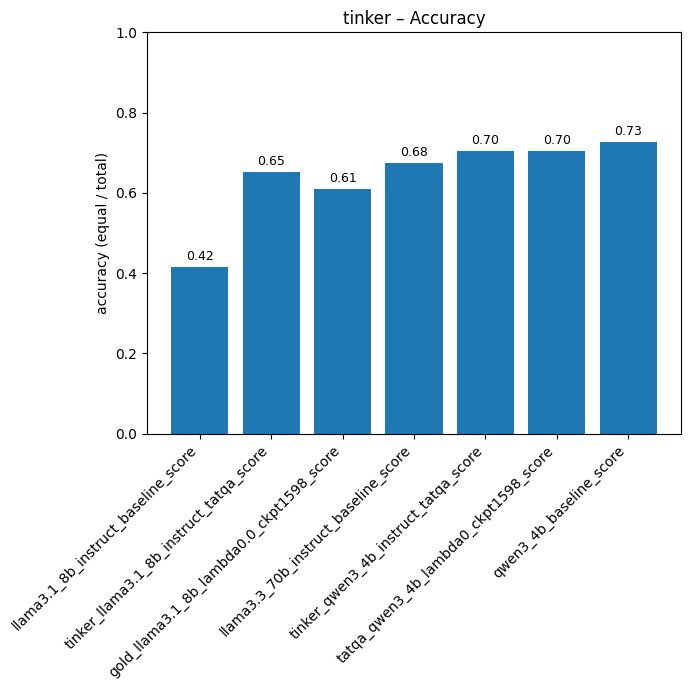

In [2]:
# ---- compute accuracy ----
accuracy = [
    (r["equal"] / r["total"]) if r["total"] > 0 else 0.0
    for r in rows
]

x = range(len(labels))

plt.figure(figsize=(7, 7))
plt.bar(x, accuracy)

for i, v in enumerate(accuracy):
    plt.text(
        i,
        v + 0.01,              # small offset above bar
        f"{v:.2f}",            # or f"{v:.1%}" if you prefer percent
        ha="center",
        va="bottom",
        fontsize=9,
    )


plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("accuracy (equal / total)")
plt.ylim(0, 1.0)
plt.title(f"{TITLE} – Accuracy")
plt.tight_layout()
plt.show()


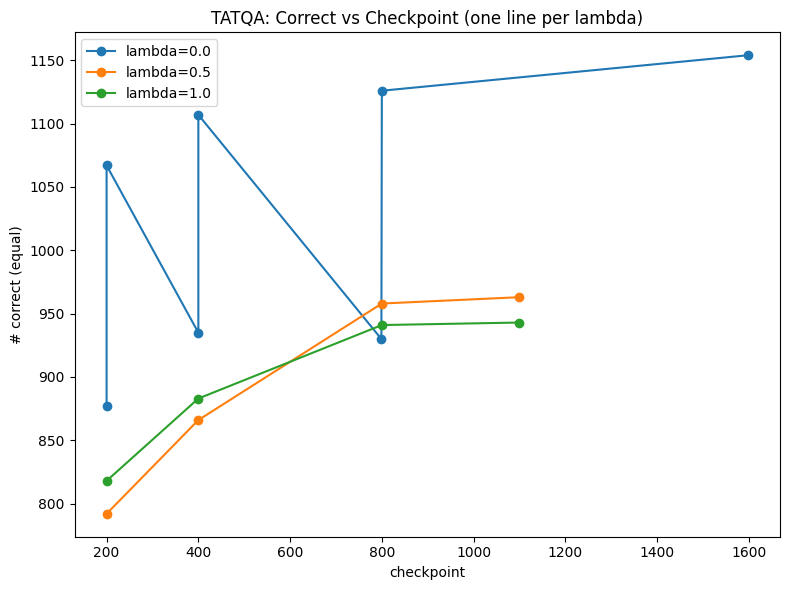

[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/tatqa_qwen2.5_1.5b_score.json
[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/tatqa_qwen3_4b_score.json
[skip] baseline not found: /data/shanghong/oumi/gold/tatqa_results/qwen2.5_1.5b.sft_disable_completions_only_ckpt200_score.json


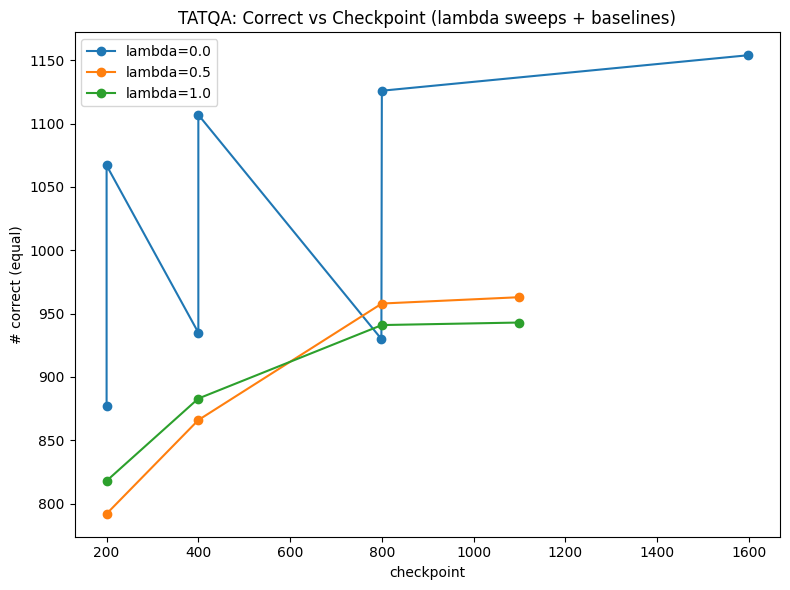

In [11]:
import re
from pathlib import Path

import matplotlib.pyplot as plt

RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")

# match: ..._lambda0.5_..._ckpt200_score.json
FILE_GLOB = "*_lambda*_ckpt*_score.json"


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "equal": data.get("equal", 0),
        "mismatch": data.get("mismatch", 0),
        "format_error": data.get("format_error", 0),
        "total": data.get("total", 0),
    }


def parse_lambda_ckpt(name: str):
    # change regex if your filenames differ
    m = re.search(r"lambda([0-9.]+).*ckpt(\d+)", name)
    if not m:
        return None, None
    lam = float(m.group(1))
    ckpt = int(m.group(2))
    return lam, ckpt


rows = []
for fp in sorted(RESULTS_DIR.glob(FILE_GLOB)):
    row = load_one_json(fp)
    if not row:
        continue

    lam, ckpt = parse_lambda_ckpt(row["name"])
    if lam is None:
        continue

    row["lambda"] = lam
    row["ckpt"] = ckpt
    rows.append(row)

if not rows:
    raise SystemExit("No matching result files found.")

# group by lambda
by_lambda = {}
for r in rows:
    by_lambda.setdefault(r["lambda"], []).append(r)

plt.figure(figsize=(8, 6))

for lam in sorted(by_lambda.keys()):
    group = sorted(by_lambda[lam], key=lambda x: x["ckpt"])
    x = [g["ckpt"] for g in group]
    y = [g["equal"] for g in group]  # <-- correct count

    plt.plot(x, y, marker="o", label=f"lambda={lam}")

plt.xlabel("checkpoint")
plt.ylabel("# correct (equal)")
plt.title("TATQA: Correct vs Checkpoint (one line per lambda)")
plt.legend()
plt.tight_layout()
plt.show()
from pathlib import Path

import matplotlib.pyplot as plt

# -------- config --------
RESULTS_DIR = Path("/data/shanghong/oumi/gold/tatqa_results")
FILE_GLOB = "*_lambda*_ckpt*_score.json"

BASELINE_FILES = [
    RESULTS_DIR / "tatqa_qwen2.5_1.5b_score.json",
    RESULTS_DIR / "tatqa_qwen3_4b_score.json",
    RESULTS_DIR / "qwen2.5_1.5b.sft_disable_completions_only_ckpt200_score.json",
]
# ------------------------


def load_one_json(fp: Path):
    try:
        data = json.loads(fp.read_text())
    except Exception as e:
        print(f"[skip] {fp.name}: failed to parse JSON ({e})")
        return None

    return {
        "name": fp.stem,
        "equal": data.get("equal", 0),  # correct count
        "total": data.get("total", 0),
    }


def parse_lambda_ckpt(name: str):
    m = re.search(r"lambda([0-9.]+).*ckpt(\d+)", name)
    if not m:
        return None, None
    return float(m.group(1)), int(m.group(2))


# ---- load sweep runs ----
rows = []
for fp in sorted(RESULTS_DIR.glob(FILE_GLOB)):
    row = load_one_json(fp)
    if not row:
        continue

    lam, ckpt = parse_lambda_ckpt(row["name"])
    if lam is None:
        continue

    row["lambda"] = lam
    row["ckpt"] = ckpt
    rows.append(row)

if not rows:
    raise SystemExit("No sweep files found.")

# ---- load baselines ----
baselines = []
for fp in BASELINE_FILES:
    if not fp.exists():
        print(f"[skip] baseline not found: {fp}")
        continue
    row = load_one_json(fp)
    if row:
        baselines.append(row)

# ---- group sweep by lambda ----
by_lambda = {}
for r in rows:
    by_lambda.setdefault(r["lambda"], []).append(r)

# ---- plot ----
plt.figure(figsize=(8, 6))

# lambda lines
for lam in sorted(by_lambda.keys()):
    group = sorted(by_lambda[lam], key=lambda x: x["ckpt"])
    x = [g["ckpt"] for g in group]
    y = [g["equal"] for g in group]
    plt.plot(x, y, marker="o", label=f"lambda={lam}")

# baseline reference lines (same color = red, different linestyles)
baseline_linestyles = {
    "qwen2.5_1.5b.sft_disable_completions_only_ckpt200_score": ":",
    "tatqa_qwen2.5_1.5b_score": "--",
    "tatqa_qwen3_4b_score": "-.",
}

for b in baselines:
    y = b["equal"]
    name = b["name"]

    linestyle = baseline_linestyles.get(name, ":")

    plt.axhline(
        y=y, color="red", linestyle=linestyle, linewidth=2.5, label=f"baseline: {name}"
    )


plt.xlabel("checkpoint")
plt.ylabel("# correct (equal)")
plt.title("TATQA: Correct vs Checkpoint (lambda sweeps + baselines)")
plt.legend()
plt.tight_layout()
plt.show()